In [238]:
"""Required imports"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler


## <div style="color:yellow" > 1.2 Multivariate relationships (without preprocessing outliers or NaN values) </div> 


## a) Spliting Train dataset into numerical and categorical features


In [ ]:
"""Does it make sense to do the train_test_split to get the X_train and X_vali and then do the analyzis below ? I decided not to"""

In [220]:
"""Reviewing all the existing columns"""
df_train.columns

Index(['Accident Date', 'Age at Injury', 'Alternative Dispute Resolution',
       'Assembly Date', 'Attorney/Representative', 'Average Weekly Wage',
       'Birth Year', 'C-2 Date', 'C-3 Date', 'Carrier Name', 'Carrier Type',
       'Claim Identifier', 'Claim Injury Type', 'County of Injury',
       'COVID-19 Indicator', 'District Name', 'First Hearing Date', 'Gender',
       'IME-4 Count', 'Industry Code', 'Industry Code Description',
       'Medical Fee Region', 'WCIO Cause of Injury Code',
       'WCIO Cause of Injury Description', 'WCIO Nature of Injury Code',
       'WCIO Nature of Injury Description', 'WCIO Part Of Body Code',
       'WCIO Part Of Body Description', 'Zip Code', 'Number of Dependents'],
      dtype='object')

In [263]:
"""Split training dataset into numerical and categorical variables """
#Split might be wrong

categorical_columns =["Alternative Dispute Resolution", "Attorney/Representative", "Carrier Name","Carrier Type", "County of Injury", "COVID-19 Indicator", "District Name", "Gender", "Industry Code",
                       "Industry Code Description", "Medical Fee Region", "WCIO Cause of Injury Code" ,"WCIO Cause of Injury Description", "WCIO Nature of Injury Code", "WCIO Nature of Injury Description",
                       "WCIO Part Of Body Code", "WCIO Part Of Body Description", "Number of Dependents", "Zip Code"
                       ] 

X_train = df_train.drop('Claim Injury Type', axis = 1)
y = df_train['Claim Injury Type']

X_train_num = X_train.drop(columns=categorical_columns)
X_train_cat = X_train.loc[:, categorical_columns]

## b) Analyzing feature <u> redundancy </u>  between numerical features using the Spearman Correlation

In [267]:
"""Determining the Spearman correlation matrix between numerical variables"""

#1 Data Sacling using the MinMaxScaler
scaler = MinMaxScaler()
#scaler.fit(X_train_num)
for col in X_train_num.columns:
    X_train_num[col] = scaler.fit_transform(X_train_num[col].to_numpy().reshape(-1,1))


#X_train_num_scaled = scaler.transform(X_train_num) # this will return an array
X_train_num_scaled = pd.DataFrame(X_train_num, columns = X_train_num.columns).set_index(X_train.index)

cor_spearman = X_train_num_scaled.corr(method ='spearman')
cor_spearman

,Accident Date,Age at Injury,Assembly Date,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Claim Identifier,First Hearing Date,IME-4 Count
Accident Date,1.000000,-0.002886,0.891761,-0.006023,0.113791,0.925665,0.072691,0.765070,0.035928,-0.060663
Age at Injury,-0.002886,1.000000,-0.015505,0.132901,-0.870883,-0.009596,0.093356,-0.015480,0.113164,0.084839
Assembly Date,0.891761,-0.015505,1.000000,-0.035552,0.083988,0.885805,0.063032,0.931911,0.013285,-0.077962
Average Weekly Wage,-0.006023,0.132901,-0.035552,1.000000,-0.096111,0.013858,0.426157,-0.035669,0.515314,-0.027448
Birth Year,0.113791,-0.870883,0.083988,-0.096111,1.000000,0.093313,-0.094486,0.084062,-0.100589,-0.079677
C-2 Date,0.925665,-0.009596,0.885805,0.013858,0.093313,1.000000,0.097886,0.761142,0.082597,-0.099716
C-3 Date,0.072691,0.093356,0.063032,0.426157,-0.094486,0.097886,1.000000,0.021520,0.508067,0.020177
Claim Identifier,0.765070,-0.015480,0.931911,-0.035669,0.084062,0.761142,0.021520,1.000000,-0.021235,-0.077801
First Hearing Date,0.035928,0.113164,0.013285,0.515314,-0.100589,0.082597,0.508067,-0.021235,1.000000,0.145236
IME-4 Count,-0.060663,0.084839,-0.077962,-0.027448,-0.079677,-0.099716,0.020177,-0.077801,0.145236,1.000000


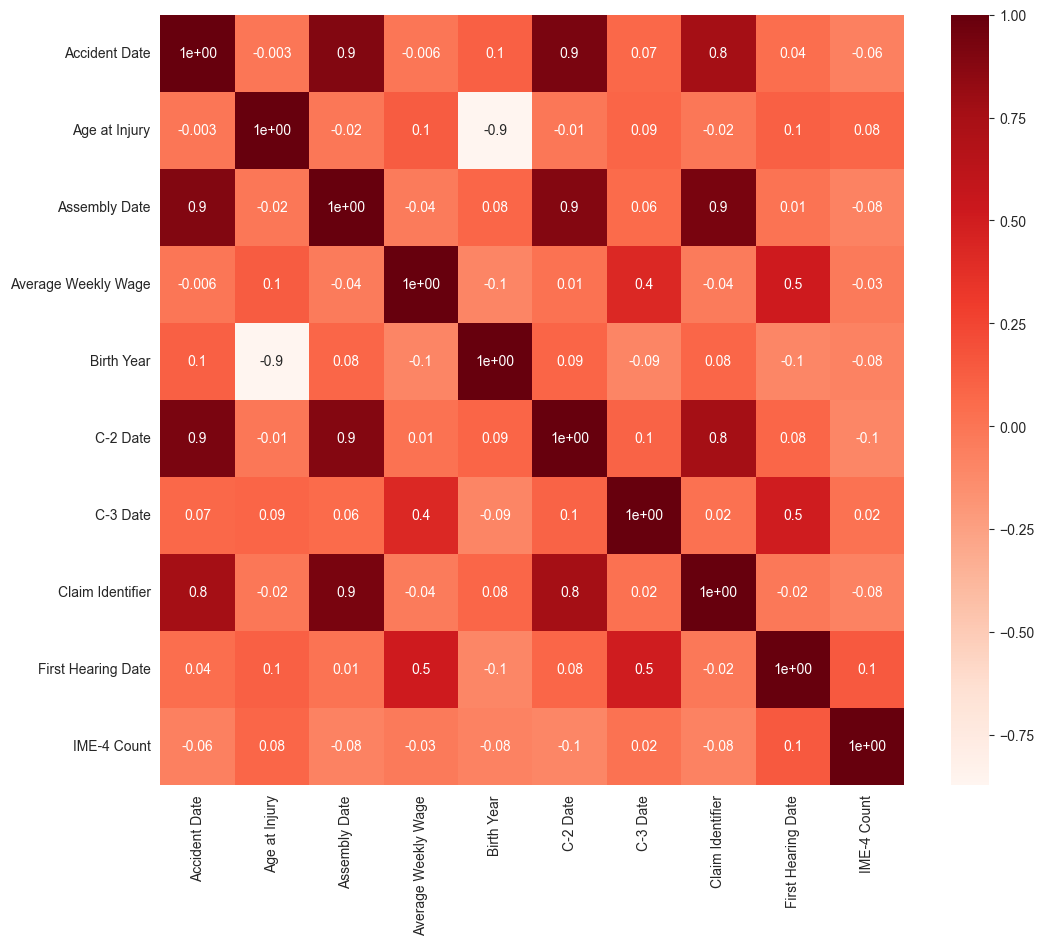

In [268]:
def cor_heatmap(cor):
    plt.figure(figsize=(12,10))
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Reds, fmt='.1')
    plt.show()


cor_heatmap(cor_spearman)

## Key notes overall
After analyzing the correlation matrix above, we have the following main candidates for removal:
1. Accident Date
2. Claim Identifier
3. Assembly Date
4. C-2 Date

<img src="/Users/joaohenriques/Desktop/Mestrados/Data Science Nova IMS/My docs/Machine Learning/Project/project_data/Spearman_conclusion.jpeg" alt="Drawing" style="width: 500px;"/>


## b) Analyzing feature <u> relevance</u> between numerical features and target variable using ANOVA or Kendal's test

TO DO 

## c) How to analyze feature <u> redundancy </u>  between categorical features ?

## d) Analyzing feature <u>relevance</u> between categorical features and target variable using Chi-Squared test

## <div style="color:yellow" > 1.3 Preprocessing activities </div>


In [269]:
"""
Suggestions:
1. As first attempt to create model, simply eliminate all the otliers
2. In my opinion, the following features should be removed due to high value of NaN values on both train and test datasets:
 - OIICS Nature of Injury Description (100%, 100%)
 - First Hearing Date (75%, 89%)
 - C-3 Date (68%, 78%)

 Maybe I should dedicate more time to exploring the possibility of inputing these missing values? Do we have the information in other columns?

 3. Data Scaling (MinMax) applied above in 1.2

"""

'\nSuggestions:\n1. As first attempt to create model, simply eliminate all the otliers\n2. In my opinion, the following features should be removed due to high value of NaN values on both train and test datasets:\n - OIICS Nature of Injury Description (100%, 100%)\n - First Hearing Date (75%, 89%)\n - C-3 Date (68%, 78%)\n\n Maybe I should dedicate more time to exploring the possibility of inputing these missing values? Do we have the information in other columns?\n\n 3. Data Scaling (MinMax) applied above in 1.2\n\n'